In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [2]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [3]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [4]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [6]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [13]:
y_train.shape

(60000,)

In [14]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [8]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.3650 - val_loss: 0.2718
Epoch 2/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.2656 - val_loss: 0.2559
Epoch 3/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.2462 - val_loss: 0.2340
Epoch 4/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.2265 - val_loss: 0.2165
Epoch 5/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.2111 - val_loss: 0.2029
Epoch 6/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.1992 - val_loss: 0.1928
Epoch 7/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.1903 - val_loss: 0.1848
Epoch 8/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.1831 - val_loss: 0.1784
Epoch 9/50
60000/60000 [==============================] - 1s 1

In [9]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

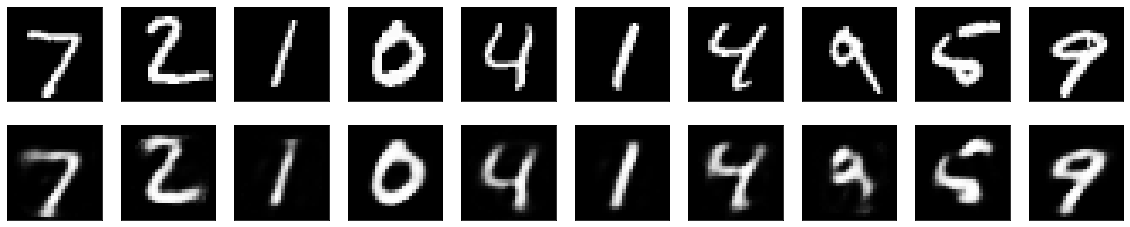

In [10]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [20]:
color = [str(item/255.) for item in y_test]

In [26]:
import matplotlib.colors as pltc
all_colors = [k for k,v in pltc.cnames.items()]


In [30]:
ten_colors = all_colors[:10]

In [70]:
ten_colors

color = ([ten_colors[item] for item in y_test])

In [71]:
np.array(color).shape

(10000,)

In [75]:
import matplotlib

In [92]:
cmap = matplotlib.cm.get_cmap('viridis')
normalize = matplotlib.colors.Normalize(vmin=min(y_test), vmax=max(y_test))
colors = [tuple(cmap(normalize(value))) for value in y_test]

In [93]:
colors

[(0.430983, 0.808473, 0.346476, 1.0),
 (0.244972, 0.287675, 0.53726, 1.0),
 (0.281412, 0.155834, 0.469201, 1.0),
 (0.267004, 0.004874, 0.329415, 1.0),
 (0.147607, 0.511733, 0.557049, 1.0),
 (0.281412, 0.155834, 0.469201, 1.0),
 (0.147607, 0.511733, 0.557049, 1.0),
 (0.993248, 0.906157, 0.143936, 1.0),
 (0.119699, 0.61849, 0.536347, 1.0),
 (0.993248, 0.906157, 0.143936, 1.0),
 (0.267004, 0.004874, 0.329415, 1.0),
 (0.20803, 0.718701, 0.472873, 1.0),
 (0.993248, 0.906157, 0.143936, 1.0),
 (0.267004, 0.004874, 0.329415, 1.0),
 (0.281412, 0.155834, 0.469201, 1.0),
 (0.119699, 0.61849, 0.536347, 1.0),
 (0.993248, 0.906157, 0.143936, 1.0),
 (0.430983, 0.808473, 0.346476, 1.0),
 (0.190631, 0.407061, 0.556089, 1.0),
 (0.147607, 0.511733, 0.557049, 1.0),
 (0.993248, 0.906157, 0.143936, 1.0),
 (0.20803, 0.718701, 0.472873, 1.0),
 (0.20803, 0.718701, 0.472873, 1.0),
 (0.119699, 0.61849, 0.536347, 1.0),
 (0.147607, 0.511733, 0.557049, 1.0),
 (0.267004, 0.004874, 0.329415, 1.0),
 (0.430983, 0.80847

<Figure size 1296x576 with 0 Axes>

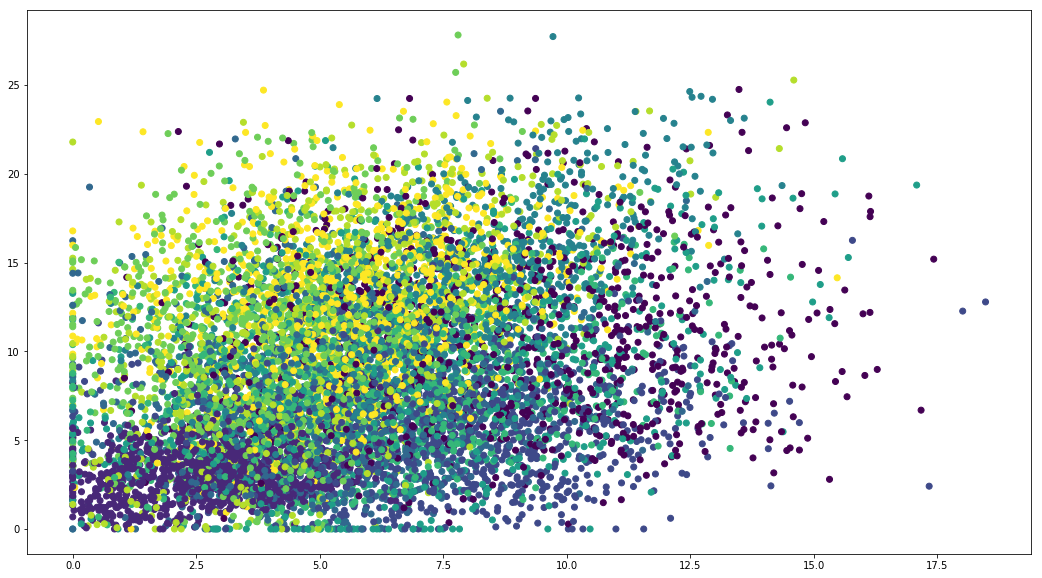

In [99]:
x_test_encoded = encoder.predict(x_test, batch_size=128)
plt.figure(figsize=(18, 8))

fig, ax = plt.subplots(figsize=(18,10))
ax.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=colors)

# cax, _ = matplotlib.colorbar.make_axes(ax)
# cbar = matplotlib.colorbar.ColorbarBase(cax, cmap=y_test)
# plt.show()

### VAE

In [107]:
from keras.layers import Lambda, Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras.losses import mse, binary_crossentropy
from keras.utils import plot_model
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
import argparse
import os

In [109]:
def sampling(args):
    """Reparameterization trick by sampling from an isotropic unit Gaussian.

    # Arguments
        args (tensor): mean and log of variance of Q(z|X)

    # Returns
        z (tensor): sampled latent vector
    """

    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean = 0 and std = 1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon


def plot_results(models,
                 data,
                 batch_size=128,
                 model_name="vae_mnist"):
    """Plots labels and MNIST digits as a function of the 2D latent vector

    # Arguments
        models (tuple): encoder and decoder models
        data (tuple): test data and label
        batch_size (int): prediction batch size
        model_name (string): which model is using this function
    """

    encoder, decoder = models
    x_test, y_test = data
    os.makedirs(model_name, exist_ok=True)

    filename = os.path.join(model_name, "vae_mean.png")
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = encoder.predict(x_test,
                                   batch_size=batch_size)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=y_test)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.savefig(filename)
    plt.show()

    filename = os.path.join(model_name, "digits_over_latent.png")
    # display a 30x30 2D manifold of digits
    n = 30
    digit_size = 28
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-4, 4, n)
    grid_y = np.linspace(-4, 4, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit

    plt.figure(figsize=(10, 10))
    start_range = digit_size // 2
    end_range = (n - 1) * digit_size + start_range + 1
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap='Greys_r')
    plt.savefig(filename)
    plt.show()


In [113]:
!pip install pydot

In [114]:
# MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

image_size = x_train.shape[1]
original_dim = image_size * image_size
x_train = np.reshape(x_train, [-1, original_dim])
x_test = np.reshape(x_test, [-1, original_dim])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
input_shape = (original_dim, )
intermediate_dim = 512
batch_size = 128
latent_dim = 2
epochs = 50

# VAE model = encoder + decoder
# build encoder model
inputs = Input(shape=input_shape, name='encoder_input')
x = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

# use reparameterization trick to push the sampling out as input
# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# instantiate encoder model
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()
plot_model(encoder, to_file='vae_mlp_encoder.png', show_shapes=True)

# build decoder model
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(original_dim, activation='sigmoid')(x)

# instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()
plot_model(decoder, to_file='vae_mlp_decoder.png', show_shapes=True)

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae_mlp')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 784)          0                                            
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 512)          401920      encoder_input[0][0]              
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            1026        dense_7[0][0]                    
__________________________________________________________________________________________________
z_log_var (Dense)               (None, 2)            1026        dense_7[0][0]                    
__________________________________________________________________________________________________
z (Lambda)

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.